In [1]:
import torch
import io
import re
import json
import pandas as pd
from model import CNNModel
import matplotlib.pyplot as plt

In [2]:
df_test = pd.read_csv('data/mnist_test.csv')

In [3]:
model = CNNModel()

In [4]:
model.load_state_dict(torch.load('models/mnist_cnn.pt'))

<All keys matched successfully>

In [4]:
weights = model.state_dict()

In [5]:
buff = io.BytesIO()

In [6]:
torch.save(weights, buff)
buff.seek(0) 

0

In [7]:
model_str = buff.getvalue()

In [8]:
buff1 = io.BytesIO(bytes(model_str))

In [9]:
model.load_state_dict(torch.load(buff1))

<All keys matched successfully>

In [10]:
# Test the model
device = 'cuda'

df_test_features = df_test.iloc[:, 1:785]
df_test_label = df_test.iloc[:, 0]

X_test = df_test_features.to_numpy()
y_test = df_test_label.to_numpy()

sample = 10

img = X_test[sample] #shape (784,1)
img = img.reshape(1, 1, 28, 28) #shape (1,1,28,28)
img  = torch.from_numpy(img).float().to(device) #tensor

# Read model from saved file
model.to(device)
prediction = model(img).detach().cpu().numpy()[0].argmax()
print('Prediction: ', prediction)

Prediction:  8


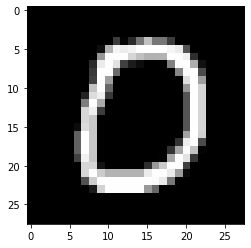

In [12]:
fig = plt.figure
plt.imshow(X_test[sample].reshape(28,28), cmap='gray')
plt.show()

In [10]:
topic = 'fed_ml/coordinator/epoch_num/model'
topic = topic.replace('epoch_num', str(1))
print(topic)
epoch_num = re.search('coordinator/(\d+)/model', topic).group(1)
epoch_num = int(epoch_num)
print(epoch_num)
print(type(epoch_num))

fed_ml/coordinator/1/model
1
<class 'int'>
